# Capstone Project - The Battle of Neighborhoods (London)

## Topic: Finding the best place to build a student hall in London


## 1. Description of the Problem
London is a popular destination for higher education where diverse students from all around the world gather to study.

According to the data published by the Higher Education Statistical Agency (HESA), in the academic year 2016-2017 London welcomed 112,200 international students to its higher education institutions, which make up 29 percent of students at higher education institutions.

One of the big concerns for international students when moving to a new city would be finding an accommodation. Student halls are the most reliable means of housing for students, but it is not easy to secure a place in one as they are in high demand. Therefore in this project, I intend to explore different neighborhoods of London and find the best area to build a new student hall for international students in London to solve this persistent problem and to find a new business opportunity.This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in London.

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. Howerver, this study will focus only on the safety and the general atmosphere of the neighborhood. Distance to universities are also an important factor in choosing a student hall, but as student halls accept students from different universities, it will be disregarded in this project.

## 2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - London Recorded Crime, List of London Boroughs, and Foursquare API.
Let's have a look at them.

### a. London Recorded Crime : Geographic Breakdown

London crime records by boroughs in the last 24 months

source: London Datastore

url: https://data.london.gov.uk/dataset/recorded_crime_summary


In [2]:
import pandas as pd
import numpy as np


In [4]:
# Read crime records data
crime = pd.read_csv("MPS Borough Level Crime (most recent 24 months).csv")
crime.head()


,MajorText,MinorText,LookUp_BoroughName,201805,201806,201807,201808,201809,201810,201811,...,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,12,6,5,3,8,5,...,5,3,6,9,8,6,4,5,6,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,126,123,127,101,107,132,105,...,134,118,109,109,97,121,97,103,108,82
2,Burglary,Burglary - Business and Community,Barking and Dagenham,24,33,30,18,33,32,39,...,31,35,37,30,30,25,31,17,27,29
3,Burglary,Burglary - Residential,Barking and Dagenham,93,77,94,84,99,94,106,...,71,67,80,97,114,130,116,123,97,56
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,6,8,7,10,7,7,...,11,7,7,10,12,3,11,3,6,9


In [5]:
# Dimension of Data
crime.shape


(1567, 27)

In [7]:
# Names of Boroughs
crime['LookUp_BoroughName'].unique()


array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [8]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()


,MajorText,MinorText,LookUp_BoroughName,Sum,201805,201806,201807,201808,201809,201810,...,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004
0,Arson and Criminal Damage,Arson,Barking and Dagenham,129,4,12,6,5,3,8,...,5,3,6,9,8,6,4,5,6,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2731,126,123,127,101,107,132,...,134,118,109,109,97,121,97,103,108,82
2,Burglary,Burglary - Business and Community,Barking and Dagenham,708,24,33,30,18,33,32,...,31,35,37,30,30,25,31,17,27,29
3,Burglary,Burglary - Residential,Barking and Dagenham,2388,93,77,94,84,99,94,...,71,67,80,97,114,130,116,123,97,56
4,Drug Offences,Drug Trafficking,Barking and Dagenham,169,8,6,8,7,10,7,...,11,7,7,10,12,3,11,3,6,9


In [9]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,129
1,Barking and Dagenham,2731
2,Barking and Dagenham,708
3,Barking and Dagenham,2388
4,Barking and Dagenham,169


In [11]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['LookUp_BoroughName'], as_index=False).sum()
crime.head()


,LookUp_BoroughName,Sum
0,Barking and Dagenham,38786
1,Barnet,59877
2,Bexley,33907
3,Brent,60584
4,Bromley,48235


In [12]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()


,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.083333
1,Barnet,2494.875000
2,Bexley,1412.791667
3,Brent,2524.333333
4,Bromley,2009.791667


In [13]:
# Explore the clean dataset - borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()


,LookUp_BoroughName,MonthlyAverage
32,Westminster,6126.875000
27,Southwark,3122.083333
5,Camden,3117.750000
24,Newham,2973.875000
20,Lambeth,2920.541667


In [14]:
### Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()


,LookUp_BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,281.750000
19,Kingston upon Thames,1061.375000
26,Richmond upon Thames,1064.000000
28,Sutton,1115.375000
23,Merton,1179.666667


### b. List of London Boroughs

 Information on boroughs and their population & coordinates
 
-Population can be used to calcuate the ratio of reported crime to population for better comparison.
-Coordinates can be used to get neighborhood data from Foursquare.

source: Wikipedia

url: https://en.wikipedia.org/wiki/List_of_London_boroughs



In [15]:
import requests
import lxml
from bs4 import BeautifulSoup


In [16]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")


b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xr48EApAMNYAA3fwjhAAAACK","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":956732369,"wgRevisionId":956732369,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Ar

In [60]:
LookUp_BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        LookUp_BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))


In [61]:
# Form a dataframe
dict = {'LookUp_BoroughName' : LookUp_BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()


,LookUp_BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [62]:
# Strip unwanted texts
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].map(lambda x: x.rstrip(']'))
info['Lookup_BoroughName'] = info['LookUp_BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].str.replace('note','')
info['LookUp_BoroughName'] = info['LookUp_BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()


,LookUp_BoroughName,Population,Coordinates,Lookup_BoroughName
0,Barking and Dagenham [ 1,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,Barking and Dagenham [note
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,Barnet
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,Bexley
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,Brent
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,Bromley


In [63]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()


,LookUp_BoroughName,Population,Coordinates,Lookup_BoroughName,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham [ 1,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,Barking and Dagenham [note,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,Barnet,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,Bexley,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,Brent,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,Bromley,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [64]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()


,LookUp_BoroughName,Population,Lookup_BoroughName,Coordinates3,Latitude,Longitude
0,Barking and Dagenham [ 1,"194,352",Barking and Dagenham [note,51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",Barnet,51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",Bexley,51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",Brent,51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",Bromley,51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [65]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()


,LookUp_BoroughName,Population,Lookup_BoroughName,Latitude,Longitude
0,Barking and Dagenham [ 1,194352,Barking and Dagenham [note,51.5607,0.1557
1,Barnet,369088,Barnet,51.6252,-0.1517
2,Bexley,236687,Bexley,51.4549,0.1505
3,Brent,317264,Brent,51.5588,-0.2817
4,Bromley,317899,Bromley,51.4039,0.0198


In [66]:
info['LookUp_BoroughName'].unique()


array(['Barking and Dagenham [ 1', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich [ 2',
       'Hackney', 'Hammersmith and Fulham [ 4', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

### c. Foursquare API

List of top 50 popular places in the neighborhood
source: Foursquare
    
url: https://api.foursquare.com


In [29]:
# Foursquare credentials
CLIENT_ID = 'BIV2M0K4TULSISCMODQ2QKB000FOV5K3NKDL4V01J42R4KDZ'
CLIENT_SECRET = '54HISPMMFHHJAAVNMGZDJOBTKJ5IZF1PCLCLAT4RMYCCIJU3'
VERSION = '20180605'

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: BIV2M0K4TULSISCMODQ2QKB000FOV5K3NKDL4V01J42R4KDZ
CLIENT_SECRET: 54HISPMMFHHJAAVNMGZDJOBTKJ5IZF1PCLCLAT4RMYCCIJU3


In [67]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LookUp_BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [68]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['LookUp_BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )


Barking and Dagenham [ 1
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich [ 2
Hackney
Hammersmith and Fulham [ 4
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [69]:
print(venues.shape)
venues.head()


(1138, 7)


,LookUp_BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham [ 1,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham [ 1,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham [ 1,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham [ 1,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham [ 1,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


### 3. Methodology
    In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

### a. Exploratory Analysis



In [70]:
#Review our data
crime.head()


,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.083333
1,Barnet,2494.875000
2,Bexley,1412.791667
3,Brent,2524.333333
4,Bromley,2009.791667


In [71]:
info.head()


,LookUp_BoroughName,Population,Lookup_BoroughName,Latitude,Longitude
0,Barking and Dagenham [ 1,194352,Barking and Dagenham [note,51.5607,0.1557
1,Barnet,369088,Barnet,51.6252,-0.1517
2,Bexley,236687,Bexley,51.4549,0.1505
3,Brent,317264,Brent,51.5588,-0.2817
4,Bromley,317899,Bromley,51.4039,0.0198


In [72]:
venues.head()


,LookUp_BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham [ 1,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham [ 1,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham [ 1,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham [ 1,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham [ 1,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


In [73]:
import matplotlib.pyplot as plt


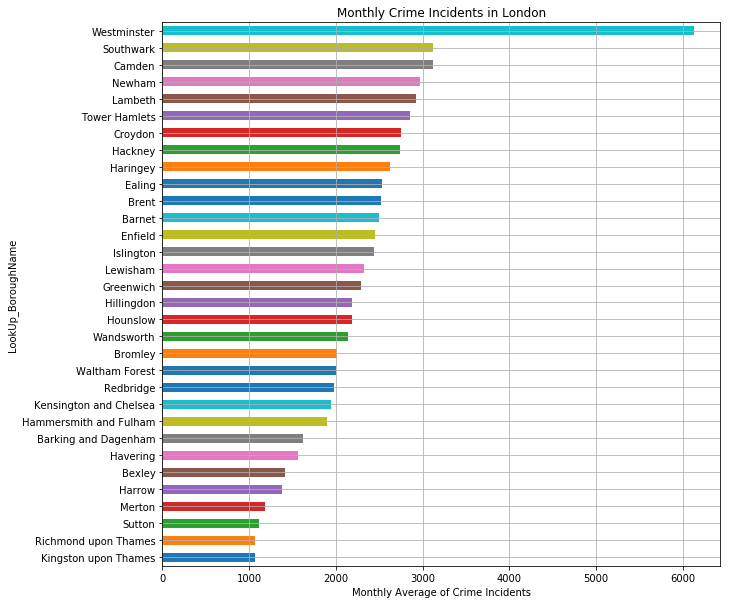

In [74]:
#Visualize crime data
crime.set_index('LookUp_BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()


Westminster has the biggest number of reported crime, followed by Camden, Newham and Southwark.



In [172]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crime.drop([3], inplace=True)


In [173]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='LookUp_BoroughName')
df.head()


,LookUp_BoroughName,MonthlyAverage,Population,Lookup_BoroughName,Latitude,Longitude
0,Barnet,2494.875000,369088,Barnet,51.6252,-0.1517
1,Bexley,1412.791667,236687,Bexley,51.4549,0.1505
2,Bromley,2009.791667,317899,Bromley,51.4039,0.0198
3,Camden,3117.750000,229719,Camden,51.5290,-0.1255
4,Croydon,2748.791667,372752,Croydon,51.3714,-0.0977


In [174]:
#Check data type
df.dtypes


LookUp_BoroughName     object
MonthlyAverage        float64
Population             object
Lookup_BoroughName     object
Latitude               object
Longitude              object
dtype: object

In [175]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes


LookUp_BoroughName     object
MonthlyAverage        float64
Population            float64
Lookup_BoroughName     object
Latitude              float64
Longitude             float64
dtype: object

In [176]:
df.shape


(34, 6)

In [177]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()


,LookUp_BoroughName,MonthlyAverage,Population,Lookup_BoroughName,Latitude,Longitude,CrimeToPop
0,Barnet,2494.875000,369088.0,Barnet,51.6252,-0.1517,6.759567
1,Bexley,1412.791667,236687.0,Bexley,51.4549,0.1505,5.969029
2,Bromley,2009.791667,317899.0,Bromley,51.4039,0.0198,6.322108
3,Camden,3117.750000,229719.0,Camden,51.5290,-0.1255,13.572016
4,Croydon,2748.791667,372752.0,Croydon,51.3714,-0.0977,7.374318


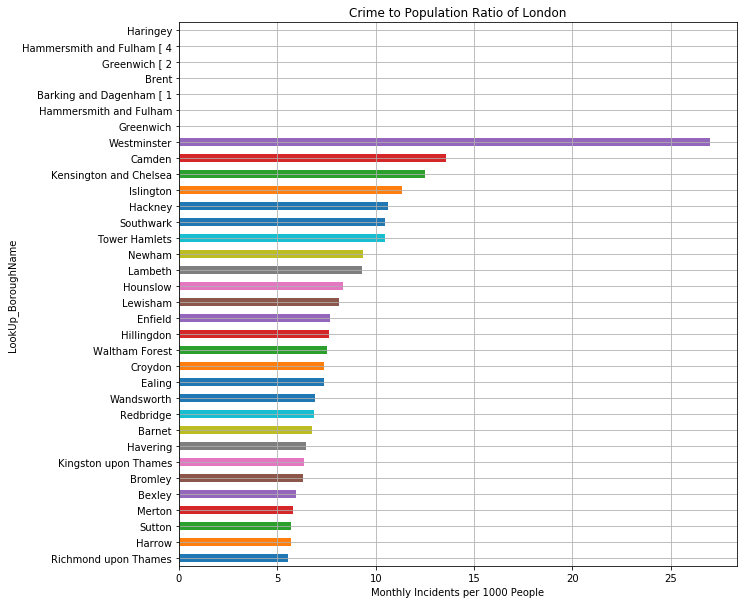

In [178]:
#Visualize crime per 1000 people
df.set_index('LookUp_BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()


In [157]:
import folium
from geopy.geocoders import Nominatim

In [158]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 51.5073219, -0.1276474.


In [159]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['LookUp_BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [51.5073219, -0.1276474],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map


 We can see that Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

### b. Cluster Analysis
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.



In [160]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))


There are 186 uniques categories.


In [161]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")


In [162]:
# Add borough name back to dataframe
LookUp_borough = venues['LookUp_BoroughName']
onehot.insert(0, 'LookUp_BoroughName',LookUp_borough)
onehot.head()


,LookUp_BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham [ 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham [ 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham [ 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham [ 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham [ 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
onehot.shape


(1138, 187)

In [126]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('LookUp_BoroughName').mean().reset_index()
grouped


,LookUp_BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham [ 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000
1,Barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000
2,Bexley,0.000000,0.000000,0.000000,0.000000,0.033333,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.033333,0.000000,0.033333,0.00,0.00,0.00,0.00,0.00000
3,Brent,0.000000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000
4,Bromley,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000
5,Camden,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00000,0.00,...,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000
6,Croydon,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00000
7,Ealing,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00000,0.00,...,0.00,0.000000,0.020000,0.040000,0.000000,0.02,0.00,0.00,0.00,0.00000
8,Enfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.040000,0.000000,0.000000,0.00,0.00,0.00,0.02,0.00000
9,Greenwich [ 2,0.025641,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,...,0.00,0.000000,0.000000,0.025641,0.025641,0.00,0.00,0.00,0.00,0.00000


In [164]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['LookUp_BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['LookUp_BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Barking and Dagenham [ 1----
               venue  freq
0               Pool  0.14
1  Martial Arts Dojo  0.14
2        Bus Station  0.14
3        Supermarket  0.14
4        Golf Course  0.14


----Barnet----
                 venue  freq
0                 Café  0.33
1             Bus Stop  0.17
2     Business Service  0.17
3  Rental Car Location  0.17
4         Home Service  0.17


----Bexley----
                  venue  freq
0        Clothing Store  0.10
1                   Pub  0.10
2           Coffee Shop  0.10
3  Fast Food Restaurant  0.07
4    Italian Restaurant  0.07


----Brent----
            venue  freq
0     Coffee Shop  0.12
1           Hotel  0.10
2  Clothing Store  0.08
3   Grocery Store  0.06
4             Bar  0.04


----Bromley----
            venue  freq
0  Clothing Store  0.18
1     Coffee Shop  0.10
2    Burger Joint  0.05
3     Pizza Place  0.05
4             Bar  0.05


----Camden----
          venue  freq
0   Coffee Shop  0.08
1          Café  0.08
2  Burger Jo

In [165]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LookUp_BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['LookUp_BoroughName'] = grouped['LookUp_BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()


,LookUp_BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham [ 1,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Flea Market,Fish Market
1,Barnet,Café,Bus Stop,Home Service,Business Service,Rental Car Location,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio
2,Bexley,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Furniture / Home Store,Optical Shop
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Indian Restaurant,Café
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Bar,Pizza Place,Stationery Store,Sushi Restaurant,Supermarket,Pub,Bookstore


In [166]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


In [167]:
kclusters = 5
london_cluster = grouped.drop('LookUp_BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]


array([2, 3, 2, 1, 2, 1, 1, 1, 2, 2])

In [168]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('LookUp_BoroughName'), on='LookUp_BoroughName')

london_merged.head()


,LookUp_BoroughName,MonthlyAverage,Population,Lookup_BoroughName,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,2494.875000,369088.0,Barnet,51.6252,-0.1517,6.759567,3.0,Café,Bus Stop,Home Service,Business Service,Rental Car Location,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio
1,Bexley,1412.791667,236687.0,Bexley,51.4549,0.1505,5.969029,2.0,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Furniture / Home Store,Optical Shop
2,Brent,2524.333333,317264.0,Brent,51.5588,-0.2817,7.956570,1.0,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Indian Restaurant,Café
3,Bromley,2009.791667,317899.0,Bromley,51.4039,0.0198,6.322108,2.0,Clothing Store,Coffee Shop,Burger Joint,Bar,Pizza Place,Stationery Store,Sushi Restaurant,Supermarket,Pub,Bookstore
4,Camden,3117.750000,229719.0,Camden,51.5290,-0.1255,13.572016,1.0,Café,Coffee Shop,Burger Joint,Hotel,Pub,Pizza Place,Train Station,Breakfast Spot,Hotel Bar,Chocolate Shop


### Now let's observe each clusters and name them according to their characteristics



In [180]:
# Cluster 0: Healthy area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,LookUp_BoroughName,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Hounslow,-0.368,8.318185,0.0,Bed & Breakfast,Pizza Place,Park,Café,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio


In [181]:
# Cluster 1: Lively area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,LookUp_BoroughName,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Brent,-0.2817,7.956570,1.0,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Indian Restaurant,Café
4,Camden,-0.1255,13.572016,1.0,Café,Coffee Shop,Burger Joint,Hotel,Pub,Pizza Place,Train Station,Breakfast Spot,Hotel Bar,Chocolate Shop
5,Croydon,-0.0977,7.374318,1.0,Pub,Coffee Shop,Portuguese Restaurant,Indian Restaurant,Park,Spanish Restaurant,Burger Joint,Burrito Place,Restaurant,Café
6,Ealing,-0.3089,7.372635,1.0,Coffee Shop,Park,Vietnamese Restaurant,Pizza Place,Burger Joint,Hotel,Clothing Store,Italian Restaurant,Pub,Bookstore
9,Hackney,-0.0553,10.622953,1.0,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Vietnamese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Grocery Store
16,Islington,-0.1022,11.327069,1.0,Pub,Ice Cream Shop,Park,Boutique,Burger Joint,Music Venue,Mediterranean Restaurant,Theater,Yoga Studio,Organic Grocery
17,Kensington and Chelsea,-0.1947,12.480665,1.0,Clothing Store,Juice Bar,Bakery,Pub,Italian Restaurant,Café,Garden,Burger Joint,Restaurant,Art Gallery
18,Kingston upon Thames,-0.3064,6.363427,1.0,Café,Coffee Shop,Burger Joint,Italian Restaurant,Pub,Department Store,Sushi Restaurant,Thai Restaurant,Latin American Restaurant,French Restaurant
19,Lambeth,-0.1163,9.293925,1.0,Caribbean Restaurant,Market,Indian Restaurant,BBQ Joint,Beer Bar,Pub,Pizza Place,Restaurant,Tapas Restaurant,Cocktail Bar
24,Richmond upon Thames,-0.3260,5.560055,1.0,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Bus Stop,Grocery Store,Pharmacy,Deli / Bodega,Sandwich Place,Café


In [182]:
# Cluster 2: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,LookUp_BoroughName,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bexley,0.1505,5.969029,2.0,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Furniture / Home Store,Optical Shop
3,Bromley,0.0198,6.322108,2.0,Clothing Store,Coffee Shop,Burger Joint,Bar,Pizza Place,Stationery Store,Sushi Restaurant,Supermarket,Pub,Bookstore
7,Enfield,-0.0799,7.656213,2.0,Clothing Store,Coffee Shop,Pub,Optical Shop,Turkish Restaurant,Shopping Mall,Supermarket,Café,Pharmacy,Stationery Store
11,Haringey,-0.1119,9.959084,2.0,Fast Food Restaurant,Indian Restaurant,Supermarket,Italian Restaurant,Gym / Fitness Center,Grocery Store,Light Rail Station,Mediterranean Restaurant,Movie Theater,Park
12,Harrow,-0.3346,5.672044,2.0,Coffee Shop,Indian Restaurant,Grocery Store,Fast Food Restaurant,Supermarket,Thai Restaurant,Platform,Indie Movie Theater,Hobby Shop,Donut Shop
13,Havering,0.1837,6.447765,2.0,Coffee Shop,Fast Food Restaurant,Clothing Store,Hotel,Shopping Mall,Café,Pub,Sandwich Place,Bookstore,Department Store
14,Hillingdon,-0.4760,7.614613,2.0,Coffee Shop,Clothing Store,Italian Restaurant,Pharmacy,Department Store,Sandwich Place,Fast Food Restaurant,Burger Joint,Pizza Place,Toy / Game Store
20,Lewisham,-0.0209,8.122656,2.0,Supermarket,Grocery Store,Italian Restaurant,Coffee Shop,Platform,Train Station,Bakery,Dessert Shop,Pub,Portuguese Restaurant
21,Merton,-0.1958,5.804789,2.0,Café,Italian Restaurant,Park,Supermarket,Indian Restaurant,Bakery,Pizza Place,Fast Food Restaurant,Garden Center,Sandwich Place
23,Redbridge,0.0741,6.857094,2.0,Fast Food Restaurant,Clothing Store,Hotel,Supermarket,Sandwich Place,Coffee Shop,Department Store,Bakery,Turkish Restaurant,Grocery Store


In [183]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,LookUp_BoroughName,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,-0.1517,6.759567,3.0,Café,Bus Stop,Home Service,Business Service,Rental Car Location,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio


In [184]:
# Cluster 3: Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,LookUp_BoroughName,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,-0.1517,6.759567,3.0,Café,Bus Stop,Home Service,Business Service,Rental Car Location,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio


In [185]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]


,LookUp_BoroughName,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Newham,0.0469,9.345137,4.0,Hotel,Pharmacy,Airport,Airport Lounge,Airport Service,Rafting,Sandwich Place,Chinese Restaurant,Light Rail Station,Electronics Store


### 4. Results & Recommendation
 Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.
 
 Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.

### a. Safety
 Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.



In [187]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)


,LookUp_BoroughName,CrimeToPop,MonthlyAverage,Population,Lookup_BoroughName,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Westminster,27.009557,6126.875000,226841.0,Westminster,51.4973,-0.1372,1.0,Hotel,Coffee Shop,Theater,Sushi Restaurant,Hotel Bar,Sandwich Place,Juice Bar,Pub,Sporting Goods Shop,Indian Restaurant
4,Camden,13.572016,3117.750000,229719.0,Camden,51.5290,-0.1255,1.0,Café,Coffee Shop,Burger Joint,Hotel,Pub,Pizza Place,Train Station,Breakfast Spot,Hotel Bar,Chocolate Shop
17,Kensington and Chelsea,12.480665,1941.916667,155594.0,Kensington and Chelsea,51.5020,-0.1947,1.0,Clothing Store,Juice Bar,Bakery,Pub,Italian Restaurant,Café,Garden,Burger Joint,Restaurant,Art Gallery
16,Islington,11.327069,2442.875000,215667.0,Islington,51.5416,-0.1022,1.0,Pub,Ice Cream Shop,Park,Boutique,Burger Joint,Music Venue,Mediterranean Restaurant,Theater,Yoga Studio,Organic Grocery
9,Hackney,10.622953,2734.125000,257379.0,Hackney,51.5450,-0.0553,1.0,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Vietnamese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Grocery Store
25,Southwark,10.460502,3122.083333,298464.0,Southwark,51.5035,-0.0804,1.0,Coffee Shop,Hotel,Bar,Indian Restaurant,Cocktail Bar,Pub,Hotel Bar,English Restaurant,Theater,Art Gallery
27,Tower Hamlets,10.456289,2853.416667,272890.0,Tower Hamlets,51.5099,-0.0059,1.0,Coffee Shop,Hotel,Italian Restaurant,Pizza Place,Chinese Restaurant,Light Rail Station,Sandwich Place,Gym / Fitness Center,Café,Grocery Store
11,Haringey,9.959084,2623.083333,263386.0,Haringey,51.6000,-0.1119,2.0,Fast Food Restaurant,Indian Restaurant,Supermarket,Italian Restaurant,Gym / Fitness Center,Grocery Store,Light Rail Station,Mediterranean Restaurant,Movie Theater,Park
22,Newham,9.345137,2973.875000,318227.0,Newham,51.5077,0.0469,4.0,Hotel,Pharmacy,Airport,Airport Lounge,Airport Service,Rafting,Sandwich Place,Chinese Restaurant,Light Rail Station,Electronics Store
19,Lambeth,9.293925,2920.541667,314242.0,Lambeth,51.4607,-0.1163,1.0,Caribbean Restaurant,Market,Indian Restaurant,BBQ Joint,Beer Bar,Pub,Pizza Place,Restaurant,Tapas Restaurant,Cocktail Bar


### b. Atmosphere

And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

According to my interpretation, 
##### Cluster 0 is 'Healthy Area' with gyms, parks, pools and golf courses as popular places.



In [189]:
london_merged.loc[london_merged['Cluster Labels'] == 0].LookUp_BoroughName.unique()


array(['Hounslow'], dtype=object)

According to my interpretation, 
##### Cluster 1 is 'Lively Area' with many pubs and restaurants.



In [192]:
london_merged.loc[london_merged['Cluster Labels'] == 1].LookUp_BoroughName.unique()


array(['Brent', 'Camden', 'Croydon', 'Ealing', 'Hackney', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Richmond upon Thames', 'Southwark', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster',
       'Hammersmith and Fulham [ 4'], dtype=object)

According to my interpretation,
##### Cluster 2 is 'Busy Area' with many coffee shops and clothing stores.



In [197]:
london_merged.loc[london_merged['Cluster Labels'] == 2].LookUp_BoroughName.unique()



array(['Bexley', 'Bromley', 'Enfield', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Lewisham', 'Merton', 'Redbridge', 'Sutton',
       'Barking and Dagenham [ 1', 'Greenwich [ 2'], dtype=object)

According to my interpretation, 
##### Cluster 3 is 'Quiet Area' with cafe, bus stop, and yoga studio as top venues.



In [196]:
london_merged.loc[london_merged['Cluster Labels'] == 3].LookUp_BoroughName.unique()


array(['Barnet'], dtype=object)

According to my interpretation, 
##### Cluster 4 is 'Traveller Area' with bed & breakfast, hotels, and airport.



In [198]:
london_merged.loc[london_merged['Cluster Labels'] == 4].LookUp_BoroughName.unique()


array(['Newham'], dtype=object)

Now, what kind of atmosphere students may prefer differ by every student. So using my personal preferance as a student moving to London and some common sense, I will give scores to each clusters.
I have decided to give preference in the order of Busy Area, Lively Area, Healthy Area, Quiet Area, and Traveller Area.

### c. Weighted score table
   Finally, let's calculate the scores of each borough.



In [199]:
score = london_merged[['LookUp_BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()


,LookUp_BoroughName,CrimeToPop,Cluster Labels
0,Barnet,6.759567,3.0
1,Bexley,5.969029,2.0
2,Brent,7.956570,1.0
3,Bromley,6.322108,2.0
4,Camden,13.572016,1.0


In [200]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()


,LookUp_BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barnet,6.759567,3.0,0.944077
1,Bexley,5.969029,2.0,0.980933
2,Brent,7.956570,1.0,0.888272
3,Bromley,6.322108,2.0,0.964472
4,Camden,13.572016,1.0,0.626473


In [201]:
score['Atmosphere'] = 0
score.head()


,LookUp_BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barnet,6.759567,3.0,0.944077,0
1,Bexley,5.969029,2.0,0.980933,0
2,Brent,7.956570,1.0,0.888272,0
3,Bromley,6.322108,2.0,0.964472,0
4,Camden,13.572016,1.0,0.626473,0


In [202]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()


,LookUp_BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barnet,6.759567,3.0,0.944077,0.7
1,Bexley,5.969029,2.0,0.980933,1.0
2,Brent,7.956570,1.0,0.888272,0.9
3,Bromley,6.322108,2.0,0.964472,1.0
4,Camden,13.572016,1.0,0.626473,0.9


In [203]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)


,LookUp_BoroughName,Safety,Atmosphere,Score
12,Harrow,0.994779,1.0,1.994779
26,Sutton,0.993793,1.0,1.993793
21,Merton,0.988590,1.0,1.988590
1,Bexley,0.980933,1.0,1.980933
3,Bromley,0.964472,1.0,1.964472
13,Havering,0.958614,1.0,1.958614
23,Redbridge,0.939531,1.0,1.939531
14,Hillingdon,0.904214,1.0,1.904214
7,Enfield,0.902275,1.0,1.902275
24,Richmond upon Thames,1.000000,0.9,1.900000


### 5. Conclusion
From our analysis, we have found that the five boroughs below are the best places to build a student hall, based on safety and atmosphere of the neighborhood. The top five boroughs all belong to the Busy Area cluster, with many coffee shops and clothing stores. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.



In [204]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5


,LookUp_BoroughName,MonthlyAverage,Population,Lookup_BoroughName,Latitude,Longitude,CrimeToPop
13,Hounslow,2182.750000,262407.0,Hounslow,51.4746,-0.3680,8.318185
27,Wandsworth,2142.750000,310516.0,Wandsworth,51.4567,-0.1910,6.900611
2,Bromley,2009.791667,317899.0,Bromley,51.4039,0.0198,6.322108
22,Richmond upon Thames,1064.000000,191365.0,Richmond upon Thames,51.4479,-0.3260,5.560055
19,Merton,1179.666667,203223.0,Merton,51.4014,-0.1958,5.804789


In [206]:
# make a map of Toronto using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['LookUp_BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [51.5073219, -0.1276474],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)

map


### Limitations
However, it obviously seems strange that the best places to live in Loondon are all far out suburbs. This is due to limitations this research holds. Among numerous factors that determine a good neighborhood, we only took into consideration what type of venues are popular and how many crime incidents are recorded for the sake of simplification. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.

To overcome the limitations of this study, we will need further data such as distance to city center and housing prices. Also, taking crime categories into factor and weighting them differently may be helpful. Nevertheless, this research was still meaningful in that we were able to explore the neighborhoods in depth.